In [1]:
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
from scipy.io import wavfile

fs, som = wavfile.read('elefante.wav')

ipd.Audio(som,rate=fs)

In [3]:
som.size

57910

In [4]:
def plot_espectro_Omega(y):
    """ Rotina que exibe o espectro de magnitude (X(e^(jw))) de um sinal discreto em função de Omega"""

    # modulo da transf. de Fourier
    fft_y = np.abs(np.fft.fft(y))

    # frequencias avaliadas (rad)
    w = np.linspace(-np.pi, np.pi, fft_y.size)

    # normalizando fft(y)
    fft_y_norm = fft_y/np.max(fft_y)

    # centrando fft(y) em 0
    fft_y_center = np.roll(fft_y_norm, fft_y.size//2)

    # exibe o grafico do espectro
    plt.figure() 
    plt.plot(w, fft_y_center)
    plt.xlabel('$\Omega$ [rad]', fontsize=10)
    plt.ylabel('|$Y(e^{j\Omega})$|', fontsize=10)
    plt.grid(True)
    plt.xticks(
        ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
        labels=[r'$-\pi$', r'$-\pi/2$', 0, r'$\pi/2$', r'$\pi$']
    )
    plt.show()


In [5]:
def plot_espectro_Hz(y, Fs, width=14, height=6, show=True, save=None):
    """ Rotina que exibe o espectro de magnitude (X(ejw)) de um sinal discreto em função de Hz"""

    # modulo da transf. de Fourier
    fft_y = np.abs(np.fft.fft(y))

    # frequencias avaliadas (Hz)
    f = np.linspace(0, Fs, fft_y.size)

    # normalizando fft(y)
    fft_y_norm = fft_y/np.max(fft_y)

    # exibe o grafico do espectro
    fig, ax = plt.subplots(figsize=(width, height))
    ax.plot(f, fft_y_norm)
    plt.xlabel('$f$ [kHz]', fontsize=18)
    plt.ylabel('|$Y(f)$|', fontsize=18)
    ax.grid(True)
    plt.yticks(fontsize=16)
    plt.xticks(
        ticks=[0, Fs//4, Fs//2, 3*Fs//4, Fs],
        labels=[0, Fs//4//1000, Fs//2//1000,3*Fs//4//1000, Fs//1000],
        fontsize=16
    )

    fig.tight_layout()

    if isinstance(save, str):
        fig.savefig(save)

    if show:
        fig.show()

    return fig, ax


<ipython-input-6-9fabfbd52c4b>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


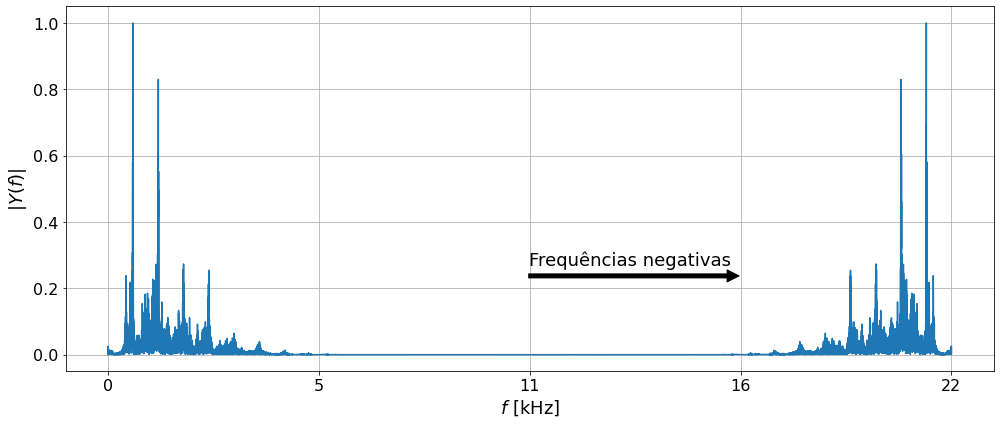

In [6]:
fig, ax = plot_espectro_Hz(
    som,
    fs,
    show=False,
)

ax.annotate('Frequências negativas', (11e3, .27), fontsize=18)
ax.annotate('', (16.5e3, .2375), (11e3, .2375), fontsize=18, arrowprops=dict(color='black'))

fig.savefig('espectro_Hz.png')

fig.show()


In [7]:
fft_y = np.abs(np.fft.fft(som))
fft_y_norm = fft_y / np.max(fft_y)

# centrando fft(y) em 0
fft_y_center = np.roll(fft_y_norm, som.size//2)

f = np.linspace(-fs/2, fs/2, som.size)

# plt.plot(f, fft_y)
index_max_p = np.where(fft_y_center == np.max(fft_y_center[som.size//2:]))[0][0]
index_max_n = np.where(fft_y_center == np.max(fft_y_center[:som.size//2]))[0][0]

print(f[index_max_p], fft_y_center[index_max_p])
print(f[index_max_n], fft_y_center[index_max_n])

656.2567994612236 1.0
-655.8760296327 0.9999999999999998


<ipython-input-8-59c76e7bb06f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


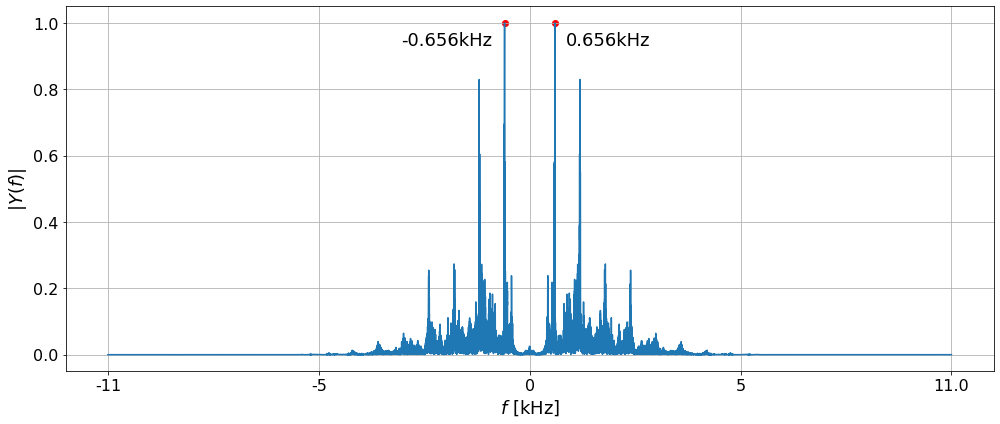

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(f, fft_y_center)
ax.scatter([f[index_max_p], f[index_max_n]], [fft_y_center[index_max_p], fft_y_center[index_max_n]], c='r')
ax.annotate(f'{f[index_max_p]/1000:.3f}kHz', (f[index_max_p] + 300, fft_y_center[index_max_p] - 2/3/10), fontsize=18)
ax.annotate(f'{f[index_max_n]/1000:.3f}kHz', (f[index_max_n] - 2700, fft_y_center[index_max_n] - 2/3/10), fontsize=18)
plt.xlabel('$f$ [kHz]', fontsize=18)
plt.ylabel('|$Y(f)$|', fontsize=18)
ax.grid(True)
plt.yticks(fontsize=16)
plt.xticks(
    ticks=[-fs/2, -fs//4, 0, fs//4, fs/2],
    labels=[int(np.ceil(-fs/2/1000)), int(np.ceil(-fs//4/1000)), 0, fs//4//1000, fs/2//1000],
    fontsize=16
)
fig.tight_layout()
fig.savefig('max_hz.png')
fig.show()

In [9]:
som_sub = som[::7]
fs_sub = fs/7

fft_y_sub = np.abs(np.fft.fft(som_sub))
fft_y_norm_sub = fft_y_sub / np.max(fft_y_sub)

# centrando fft(y) em 0
fft_y_center_sub = np.roll(fft_y_norm_sub, som_sub.size//2)

f_sub = np.linspace(-fs_sub/2, fs_sub/2, som_sub.size)

# plt.plot(f, fft_y)
index_max_sub_p = np.where(fft_y_center_sub == np.max(fft_y_center_sub[:som_sub.size//2]))[0][1]
index_max_sub_n = np.where(fft_y_center_sub == np.max(fft_y_center_sub[som_sub.size//2:]))[0][0]

print(f[index_max_sub_p], fft_y_center_sub[index_max_sub_p])
print(f[index_max_sub_n], fft_y_center_sub[index_max_sub_n])

-8794.06957467751 1.0
-10106.202403771435 1.0


<ipython-input-10-9d3133258a34>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


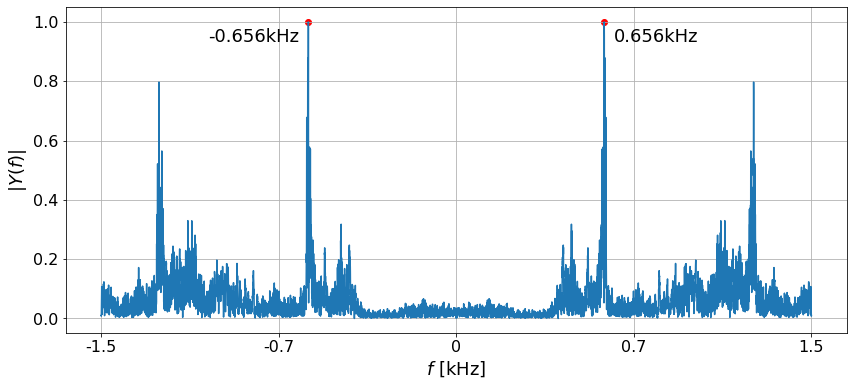

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(f_sub, fft_y_center_sub)
ax.scatter([f_sub[index_max_sub_p], f_sub[index_max_sub_n]], [fft_y_center_sub[index_max_sub_p], fft_y_center_sub[index_max_sub_n]], c='r')
ax.annotate(f'{f_sub[index_max_sub_p]/1000:.3f}kHz', (f_sub[index_max_sub_p] + 300/7, fft_y_center_sub[index_max_sub_p] - 2/3/10), fontsize=18)
ax.annotate(f'{f_sub[index_max_sub_n]/1000:.3f}kHz', (f_sub[index_max_sub_n] - 3100/7, fft_y_center_sub[index_max_sub_n] - 2/3/10), fontsize=18)
plt.xlabel('$f$ [kHz]', fontsize=18)
plt.ylabel('|$Y(f)$|', fontsize=18)
ax.grid(True)
plt.yticks(fontsize=16)
plt.xticks(
    ticks=[-fs/2/7, -fs/4/7, 0, fs/4/7, fs/2/7],
    labels=[int(np.ceil(-fs/2/7/100))/10, int(np.ceil(-fs//4/7/100))/10, 0, fs//4//7//100/10, fs/2//7//100/10],
    fontsize=16
)
fig.savefig('espectro_decimado_Hz.png')
fig.show()

In [11]:
def closest_index(arr: np.array, value):
    distance = np.abs(arr - value)
    return np.where(distance == np.min(distance))[0][0]

In [12]:
index_lower = closest_index(f, -1575)
index_upper = closest_index(f, 1575)
fft_y_filtered_center = np.copy(fft_y_center)
fft_y_filtered_center[:index_lower] = 0
fft_y_filtered_center[index_upper:] = 0

fft_y_filtered = np.roll(fft_y_filtered_center, -som.size//2)

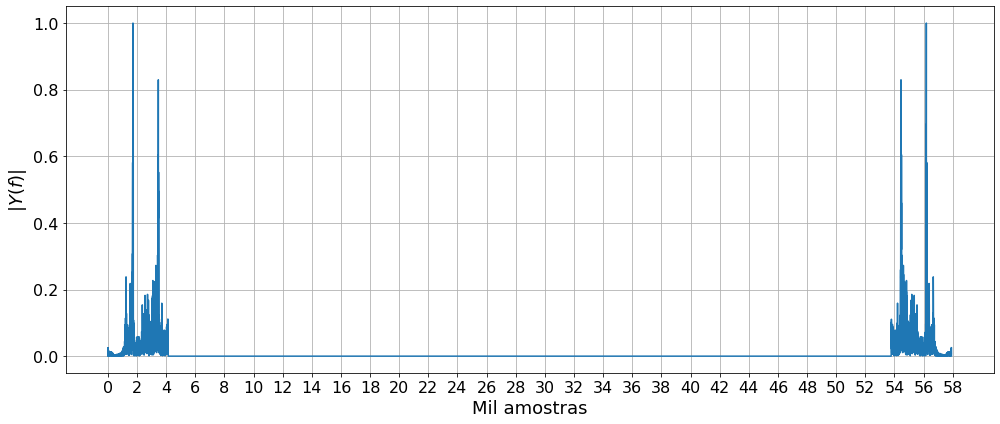

In [13]:
fig = plt.figure(figsize=(14, 6))
plt.plot(fft_y_filtered)
plt.ylabel('|$Y(f)$|', fontsize=18)
plt.grid(True)
plt.yticks(fontsize=16)
plt.xticks(ticks=range(0,60000, 2000), labels=range(0,60,2), fontsize=16)
plt.xlabel('Mil amostras', fontsize=18)
fig.tight_layout()
plt.savefig('filter.png')
plt.show()

In [14]:
som_filtered = np.fft.ifft(fft_y_filtered).real

In [15]:
ipd.Audio(som_filtered, rate=fs)

<ipython-input-16-fe081a175099>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


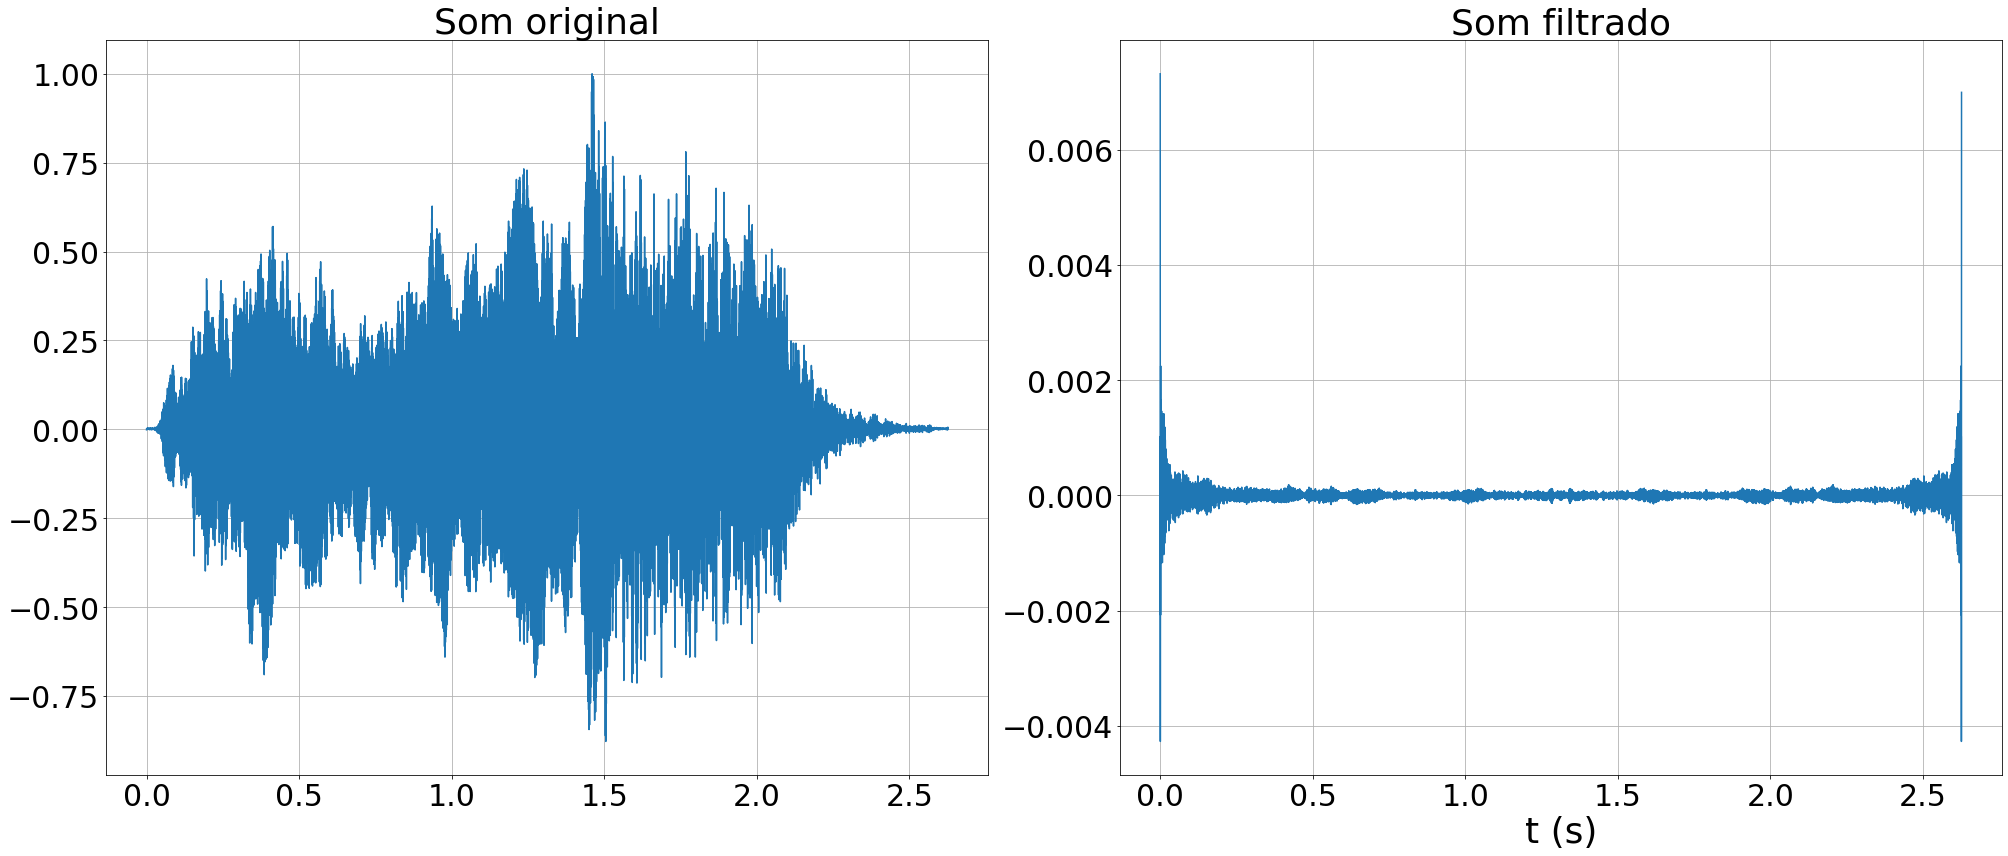

In [16]:
t = np.arange(som.size)/fs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 12))
ax1.plot(t, som);
ax1.grid()
ax1.set_title('Som original', fontsize=36)
plt.xlabel('t (s)', fontsize=36);
ax1.tick_params(labelsize=30)
ax2.plot(t, som_filtered);
ax2.grid()
ax2.set_title('Som filtrado', fontsize=36)
plt.xlabel('t (s)', fontsize=36)
ax2.tick_params(labelsize=30)
fig.tight_layout()
fig.subplots_adjust(wspace=0.15)
fig.savefig('som_filtrado.png')
fig.show()

In [17]:
som_filtered_subsample = som_filtered[::7]

In [26]:
ipd.Audio(som_filtered_subsample, rate=fs_sub)

<ipython-input-18-eeb593053501>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


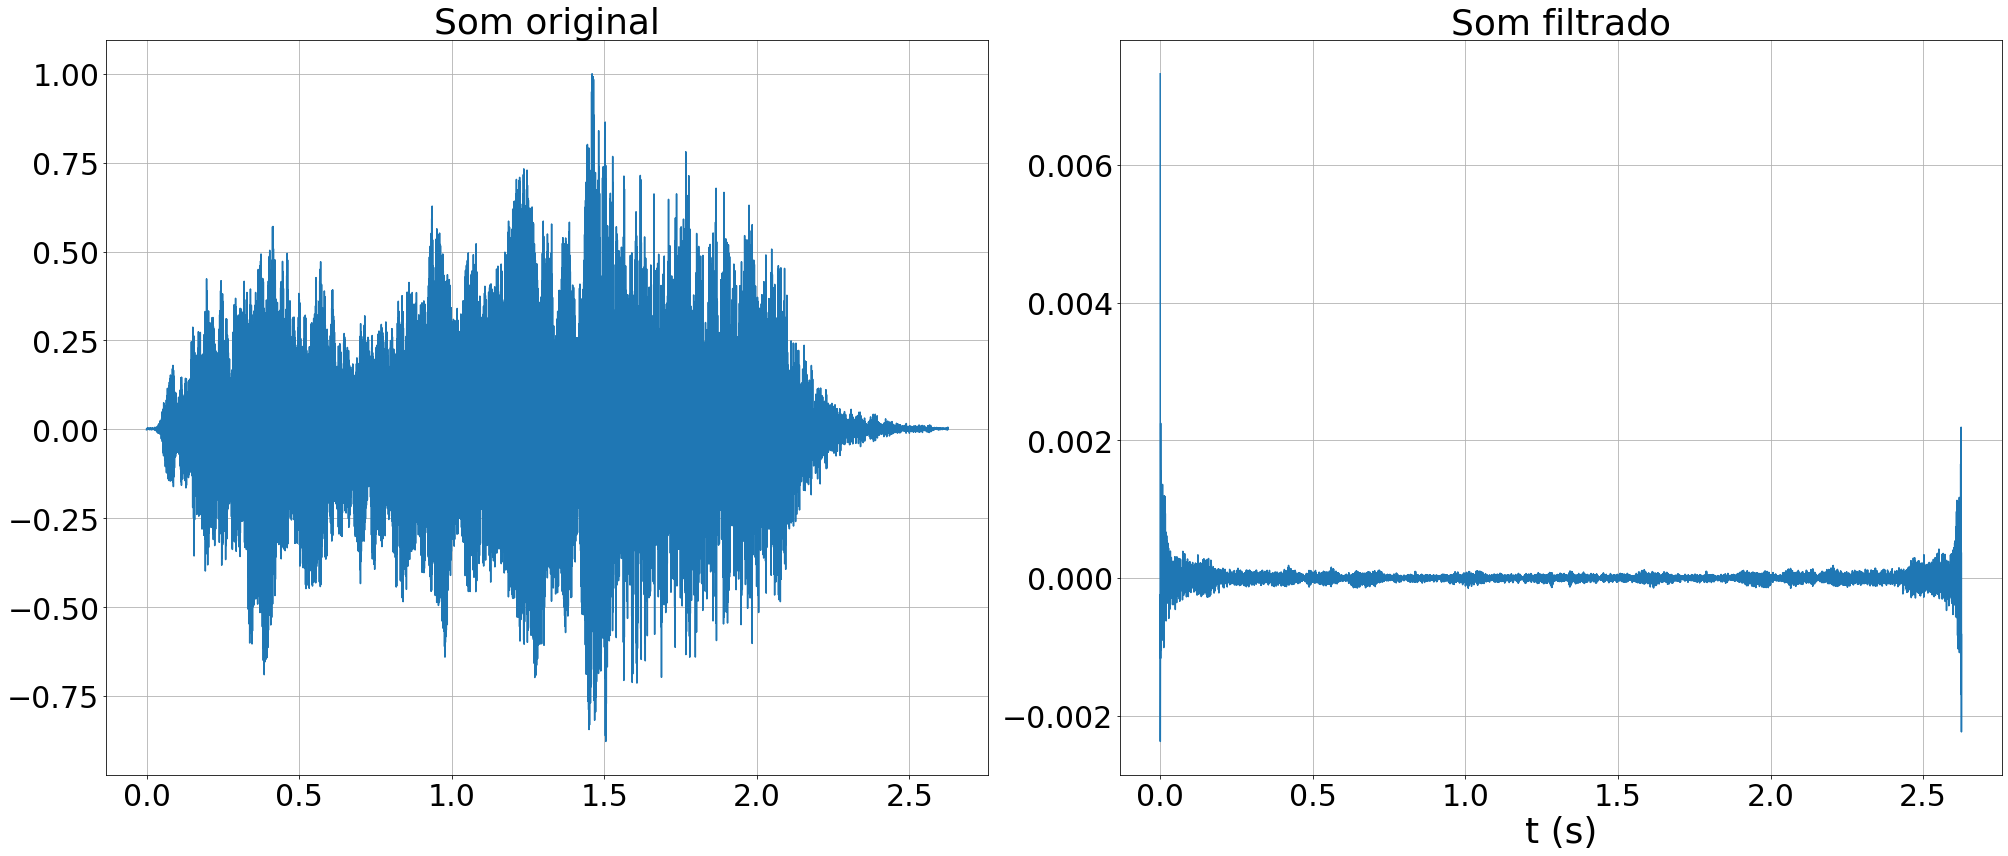

In [18]:
t_sub = np.arange(som_sub.size)/fs_sub
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 12))
ax1.plot(t, som);
ax1.grid()
ax1.set_title('Som original', fontsize=36)
plt.xlabel('t (s)', fontsize=36);
ax1.tick_params(labelsize=30)
ax2.plot(t_sub, som_filtered_subsample);
ax2.grid()
ax2.set_title('Som filtrado', fontsize=36)
plt.xlabel('t (s)', fontsize=36)
ax2.tick_params(labelsize=30)
fig.tight_layout()
fig.subplots_adjust(wspace=0.15)
fig.savefig('som_filtrado.png')
fig.show()

In [19]:
fft_som_filtered_subsample = np.abs(np.fft.fft(som_filtered_subsample))
np.average(fft_som_filtered_subsample - fft_y_filtered[som.size//2 - som_sub.size//2:som.size//2 + som_sub.size//2 + 1])

0.007524296560252872

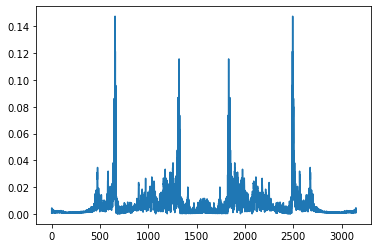

In [20]:
plt.plot(np.linspace(0, 3150, fft_som_filtered_subsample.size), fft_som_filtered_subsample)

<ipython-input-21-2fe4d952c3f0>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


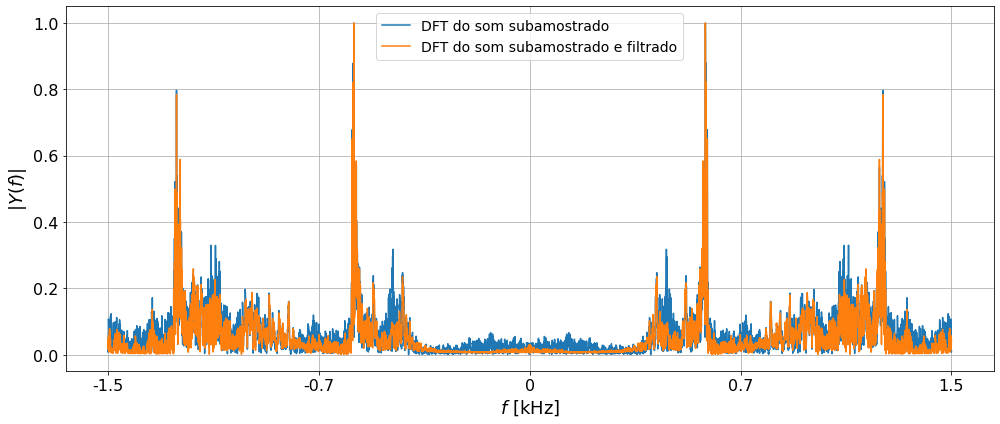

In [21]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(f_sub, fft_y_center_sub, label='DFT do som subamostrado')
ax.plot(f_sub, np.roll(fft_som_filtered_subsample, som_sub.size//2) / np.max(np.abs(np.fft.fft(som_filtered_subsample))), label='DFT do som subamostrado e filtrado')
plt.xlabel('$f$ [kHz]', fontsize=18)
plt.ylabel('|$Y(f)$|', fontsize=18)
ax.grid(True)
plt.yticks(fontsize=16)
plt.xticks(
    ticks=[-fs/2/7, -fs/4/7, 0, fs/4/7, fs/2/7],
    labels=[int(np.ceil(-fs/2/7/100))/10, int(np.ceil(-fs//4/7/100))/10, 0, fs//4//7//100/10, fs/2//7//100/10],
    fontsize=16
)
ax.legend(fontsize=14)
fig.tight_layout()
fig.savefig('comparacao.png')
fig.show()

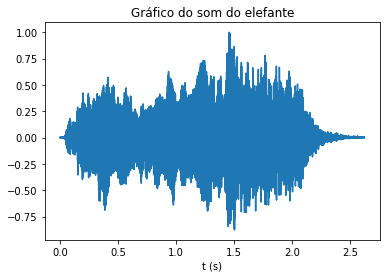

In [22]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.title('Gráfico do som do elefante')
plt.xlabel('t (s)');

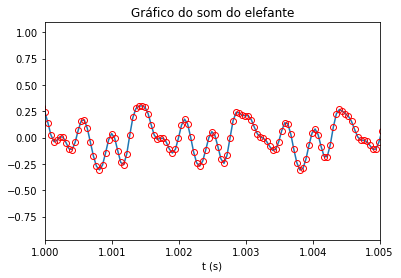

In [23]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.plot(t,som,'ro',fillstyle = 'none')
plt.title('Gráfico do som do elefante')
plt.xlabel('t (s)');
plt.xlim((1,1.005));

In [24]:
subamostrado = som[::7]

fs_nova = 

ipd.Audio(subamostrado,rate=int(fs_nova))

SyntaxError: invalid syntax (<ipython-input-24-9ee2e7aa7776>, line 3)